In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "appid": api_key
}


df = pd.DataFrame({"City" : [],
                   "Cloudiness" : [],
                   "Country" : [],
                   "Date" : [],
                   "Humidity" : [],
                   "Lat" : [],
                   "Lng" : [],
                   "Max Temp" : [],
                   "Wind Speed" : []
})

print("""Beginning Data Retrieval     
-----------------------------
""")

count = 1
for city in cities:
    params["q"] = city 
    response = requests.get(url, params=params).json()
    if response["cod"] != "404":
        city = response["name"] 
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = "{0:.0f}".format(response["dt"])
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        Max_Temp = "{0:.2f}".format(((response["main"]["temp_max"]-273.15) * 9/5) + 32)
        Wind_Speed = response["wind"]["speed"]
        df = df.append({"City":city, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, 
                        "Lat":lat, "Lng":lng, "Max Temp":Max_Temp, "Wind Speed":Wind_Speed}, ignore_index=True)
        print(f"Processing Record {count} | {city}")
        count += 1
    else:
        print("City not found. Skipping...")

print("""-----------------------------
Data Retrieval Complete      
-----------------------------
""")

Beginning Data Retrieval     
-----------------------------

Processing Record 1 | Cherskiy
Processing Record 2 | Katsuura
Processing Record 3 | Kodinar
Processing Record 4 | Vaini
Processing Record 5 | Jerome
Processing Record 6 | Georgetown
Processing Record 7 | Ardatov
Processing Record 8 | Ormara
City not found. Skipping...
Processing Record 9 | Ancud
Processing Record 10 | Rikitea
Processing Record 11 | Cape Town
Processing Record 12 | Saskylakh
Processing Record 13 | Iglesias
Processing Record 14 | Amahai
Processing Record 15 | Lumeje
City not found. Skipping...
Processing Record 16 | Vrangel
Processing Record 17 | Arraial do Cabo
Processing Record 18 | Springbok
Processing Record 19 | Esperance
Processing Record 20 | Aransas Pass
Processing Record 21 | Cam Ranh
Processing Record 22 | Hermanus
Processing Record 23 | Benjamin Hill
Processing Record 24 | Vestmannaeyjar
Processing Record 25 | Carnarvon
Processing Record 26 | Hamilton
Processing Record 27 | Port Blair
City not found.

Processing Record 228 | Salalah
Processing Record 229 | Bontang
City not found. Skipping...
Processing Record 230 | Banda Aceh
City not found. Skipping...
Processing Record 231 | Miles City
Processing Record 232 | Kaitangata
City not found. Skipping...
Processing Record 233 | Lavrentiya
Processing Record 234 | Kavieng
Processing Record 235 | Cidreira
Processing Record 236 | Hami
Processing Record 237 | Oyama
Processing Record 238 | Camopi
Processing Record 239 | Beloha
Processing Record 240 | College
Processing Record 241 | Trzebnica
Processing Record 242 | Ust-Kuyga
Processing Record 243 | Qaqortoq
Processing Record 244 | Mbekenyera
City not found. Skipping...
Processing Record 245 | Tornio
Processing Record 246 | Yashkul
Processing Record 247 | Leh
Processing Record 248 | Clyde River
City not found. Skipping...
Processing Record 249 | Talnakh
Processing Record 250 | Kahului
Processing Record 251 | Rayevskiy
Processing Record 252 | Kruisfontein
City not found. Skipping...
Processing R

Processing Record 448 | Mantua
Processing Record 449 | Morrope
Processing Record 450 | Matara
Processing Record 451 | Bayji
Processing Record 452 | Nam Som
Processing Record 453 | Trairi
Processing Record 454 | Zhoucheng
Processing Record 455 | Warwick
City not found. Skipping...
City not found. Skipping...
Processing Record 456 | Sikonge
Processing Record 457 | Husavik
Processing Record 458 | Orizona
City not found. Skipping...
Processing Record 459 | Muros
Processing Record 460 | Bauchi
Processing Record 461 | Rovaniemi
Processing Record 462 | Gryazovets
Processing Record 463 | Calabar
Processing Record 464 | Guymon
Processing Record 465 | Oconomowoc
Processing Record 466 | Abha
Processing Record 467 | Nizhnevartovsk
Processing Record 468 | Carutapera
Processing Record 469 | Sekoma
Processing Record 470 | Kamenka
Processing Record 471 | Grindavik
Processing Record 472 | Rio Gallegos
Processing Record 473 | Galle
Processing Record 474 | Sept-Iles
City not found. Skipping...
Processing

In [4]:
df.to_csv(output_data_file, index=False, header=True)
df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [5]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,94.0,RU,1567296559,71.0,68.75,161.30,36.80,2.49
1,Katsuura,75.0,JP,1567296560,88.0,33.93,134.50,77.00,2.60
2,Kodinar,66.0,IN,1567296560,92.0,20.79,70.70,78.92,3.23
3,Vaini,100.0,IN,1567296560,96.0,15.34,74.49,75.14,1.94
4,Jerome,1.0,US,1567296560,13.0,34.75,-112.11,100.00,4.10


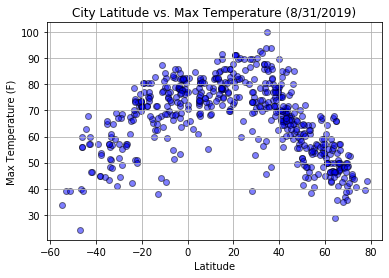

In [6]:
# Latitude vs. Temperature Plot
df["Max Temp"] = df["Max Temp"].astype(float)
plt.scatter(df["Lat"],df["Max Temp"],color="blue",edgecolor="Black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (8/31/2019)")
plt.grid()
plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")
plt.show()

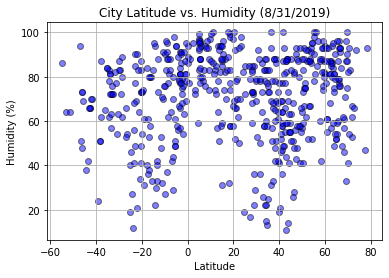

In [7]:
# Latitude vs. Humidity Plot
plt.scatter(df["Lat"],df["Humidity"],color="blue",edgecolor="Black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (8/31/2019)")
plt.grid()
plt.savefig("Images/City_Latitude_vs_Humidity.png")
plt.show()

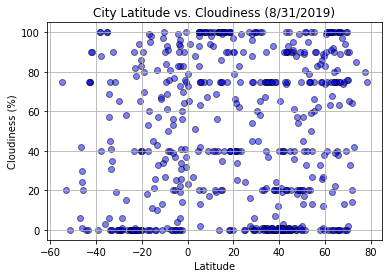

In [8]:
# Latitude vs. Cloudiness Plot
plt.scatter(df["Lat"],df["Cloudiness"], color="blue",edgecolor="Black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (8/31/2019)")
plt.grid()
plt.savefig("Images/City_Latitude_vs_Cloudiness.png")
plt.show()

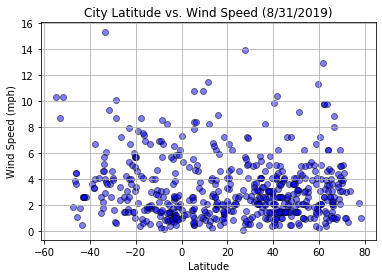

In [9]:
# Latitude vs. Wind Speed Plot
plt.scatter(df["Lat"],df["Wind Speed"],color="blue",edgecolor="Black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (8/31/2019)")
plt.grid()
plt.savefig("Images/City_Latitude_vs_Wind_Speed.png")
plt.show()